# Part2 深度学习实践
1-4章主要是介绍深度学习，以及其工作原理，5-9章将通过实践培养出如何用深度学习解决实际问题。
# 第5章 深度学习用于计算机视觉
理解卷积神经网络  
使用数据增强来降低过拟合  
使用预训练的卷积神经网络进行特征提取  
微调预训练的卷积神经网络  
将卷积神经网络学到的内容及其如何做出分类决策可视化
## 5.4 卷积神经网络简介
深入介绍神经网络原理，以及在计算机视觉任务上为何如此成功。下面是Conv2D层和MaxPooling2D层的堆叠。

In [7]:
# 5-1 实例化一个小型的神经网络
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.summary()

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 5-2 在卷积神经网络上添加分类器
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [5]:
# 5-3 在MNIST图像上训练卷积神经网络
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28 ,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
              
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
22272/60000 [==========>...................] - ETA: 43s - loss: 0.0265 - acc: 0.9921

KeyboardInterrupt: 

### 5.1.1 卷积运算
密集连接层：从输入特征空间学习到的是全局模型  
卷积层：学到的是局部模式  
\*卷积神经网络学习到的模式具有平移不变性（translation invariant）。卷积网络在图像右下角学习到某个模式后，可以在任何地方识别这个模式。对于密集连接层只能重新学习。(并且视觉世界从根本上具有平移不变性)  
\*卷积世界网络可以学到模式的空间层次结构（spatial hierarchies  of patterns）。第一层卷积层会学到较小的局部模式（比如边缘），而第二层将第一层的特征组合成更大的模式，从而使卷积层越来越复杂。（并且视觉世界从根本上具有看见层次结构）  
两个空间轴（高度和宽度）和一个深度轴（channel）的3D张量，其卷积叫做特征图（feature map）。


1. padding  
2. stride

### 5.1.2 最大池化运算
在每次MaxPoolingD后，特征图的尺寸会减半。最大池化通常使用2x2的窗口或者步幅2。而卷积通常使用3x3的窗口或者步幅1。            

In [11]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_no_max_pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


\*不利于学习特征的空间层级结构。第三层3x3的窗口仍然只包含初始的输入，卷积神经网络学到的高级模式相对于初始输入来说依然很小。  
\*最后一层每个样本元素有36928个元素，会导致严重的过拟合。

注意，最大池化不是实现这种下采样的唯一方法。你已经知道，还可以在前一个卷积层中使用步幅来实现。此外，你还可以使用平均池化来代替最大池化，其方法是将每个局部输人图块变换为取该图块各通道的平均值，而不是最大值。但最大池化的效果往往比这些替代方法更好。简而言之，原因在于特征中往往编码了某种模式或概念在特征图的不同位置是否存在(因此得名特征图),而观察不同特征的最大值而不是平均值能够给出更多的信息。因此，最合理的子采样策略是首先生成密集的特征图(通过无步进的卷积),然后观察特征每个小图块上的最大激活，而不是查看输入的稀疏窗口(通过步进卷积)或对输人图块取平均，因为后两种方法可能导致错过或淡化特征是否存在的信息。

## 5.2 在小型数据集从头开始训练一个卷积神经网络
### 5.2.1 深度学习与小数据问题的相关性
通常来说，深度学习需要大量数据。但是有时候如果模型很小，并做了很好的正则化，同时任务十分简单，可能几百个样本就足够了。  
此外，神经网络还有高度的可复用性。特别是在计算机视觉领域，许多预训练模型都能公开下载到。

### 5.2.2 下载数据
本章数据在kaggle上https://www.kaggle.com/c/dogs-vs-cats/data
这个数据集包含25000张猫狗图片，大小为543MB，我们创建三个小的子集：每个类别各1000个样本的训练集，每个类别各500个样本验证集和每个类别各500个样本的测试集

In [9]:
# 5-4 将图像复制到训练、验证和测试的目录
import os, shutil

original_dataset_dir = "D:/kaggle_data/kaggle_original_data/train"

In [10]:
#生成保存小数据集的目录
base_dir = 'D:/kaggle_data/cats_and_dogs_small'
os.mkdir(base_dir)

In [11]:
# 对应划分后的序列、验证和测试的目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [12]:
# 设置猫和狗的训练、验证、测试目录                                                                       
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir , 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir) 

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [13]:
# 将图片复制到目录
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))
print('total test cat images:',len(os.listdir(test_cats_dir)))
print('total test dog images:',len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### 5.2.3 构建网络


In [16]:
# 5-5  将猫狗分类的小型卷积神经网络实例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

编译这一步，使用RMSprop优化器。因为网络最后一层是单一sigmoid单元，使用二元交叉熵作为损失函数。

In [17]:
# 5-6 配置模型用于训练
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

### 5.2.4 数据预处理 
（1）读取图像文件  
（2）将JEPG文件解码为RGB像素网络  
（3）将这些像素网络转换为浮点数张量  
（4）将像素值缩放到[0,1]区间  
keras.preprocessing.image能快速创建python生成器。

In [18]:
# 5-7 使用ImageDataGenerator从目录中读取图像 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


train_generator相当于一个迭代器，这里只用fit_generator来拟合数据

In [ ]:
# 5-8 利用批量生成器拟合数据
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 100,
        epochs = 30,
        validation_data = validation_generator,
        validation_steps = 50)
# 5-9 保存模型
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 208s 2s/step - loss: 0.6900 - acc: 0.5220 - val_loss: 0.6858 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 207s 2s/step - loss: 0.6570 - acc: 0.6165 - val_loss: 0.6462 - val_acc: 0.6160
Epoch 3/30
100/100 [==============================] - 206s 2s/step - loss: 0.6094 - acc: 0.6625 - val_loss: 0.6267 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 209s 2s/step - loss: 0.5657 - acc: 0.7140 - val_loss: 0.6011 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 205s 2s/step - loss: 0.5318 - acc: 0.7295 - val_loss: 0.5852 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 209s 2s/step - loss: 0.5085 - acc: 0.7495 - val_loss: 0.5784 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 207s 2s/step - loss: 0.4777 - acc: 0.7650 - val_loss: 0.5686 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 208s 2s/step - 

In [ ]:
# 5-10 绘制过程中的损失曲线和精度曲线
import matpltlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

训练精度随时间线性增加，直到接近100%，而验证精度停留在70%左右，显然已经过拟合了。这里我们使用视觉领域的新方法，数据增强（data augmentation）

### 5.2.5 使用数据增强
过拟合的原因是学习样本太少，这里我们生成可信图像。  
rotation_range是角度值（0-180），随机旋转  
width_shift_range和height_shift_range是图像在水平或者垂直方向上平移的范围  
shear_range是随机错切变换的角度  
zoom_range是图像随机缩放的范围  
horizontal_flip是随机将一般图像水平翻转  
flip_mode是用于填充新建图像的方法

In [21]:
# 5-11 利用ImageDatagenerator来设置数据增强
datagen= ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

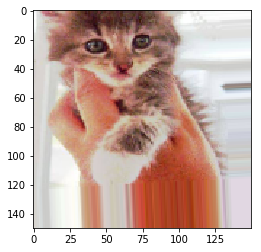

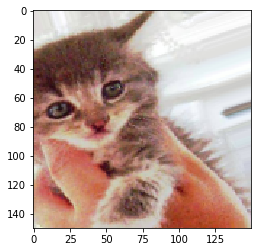

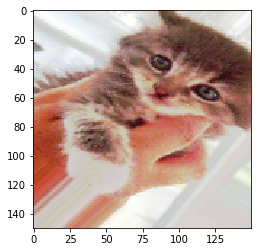

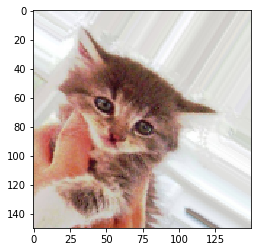

In [25]:
# 5-12 显示几个随机增强后的训练图像
from keras.preprocessing import image
import matplotlib.pyplot as plt 

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

这里再添加Dropout层

In [29]:
# 5-13 定义一个包含dropout的新卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [ ]:
# 5-14 利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

# 5-15 保存模型
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 175s 2s/step - loss: 0.6912 - acc: 0.5281 - val_loss: 0.6770 - val_acc: 0.5825
Epoch 2/100
100/100 [==============================] - 178s 2s/step - loss: 0.6762 - acc: 0.5719 - val_loss: 0.6691 - val_acc: 0.5793
Epoch 3/100
100/100 [==============================] - 184s 2s/step - loss: 0.6633 - acc: 0.5947 - val_loss: 0.6272 - val_acc: 0.6428
Epoch 4/100
100/100 [==============================] - 176s 2s/step - loss: 0.6434 - acc: 0.6203 - val_loss: 0.6134 - val_acc: 0.6459
Epoch 5/100
100/100 [==============================] - 179s 2s/step - loss: 0.6219 - acc: 0.6387 - val_loss: 0.5980 - val_acc: 0.6586
Epoch 6/100
100/100 [==============================] - 174s 2s/step - loss: 0.6116 - acc: 0.6637 - val_loss: 0.5966 - val_acc: 0.6770
Epoch 7/100
100/100 [==============================] - 173s 2s/step - loss: 0.6024 - acc: 0.6675 - val_loss: 0.5